<a href="https://colab.research.google.com/github/sripriyaagarwal16/Model-Comparison-Sarcasm-Detection/blob/main/ADASYN_TDIDF_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REPRESENTATION OF CLASS DISTRIBUTION BEFORE BALANCING USING ADASYN

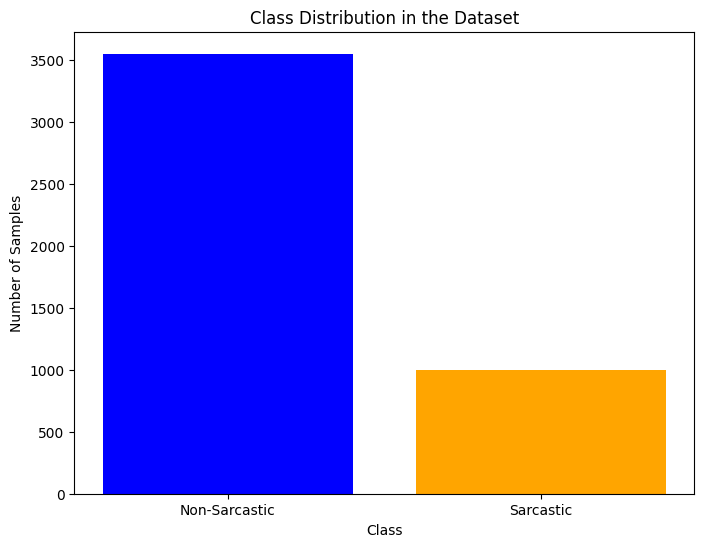

0    3553
1    1000
Name: Label, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

# Count the number of samples in each class
class_counts = data['Label'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xticks(class_counts.index, ['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Dataset')
plt.show()

print(class_counts)


REPRESENTATION OF CLASS DISTRIBUTION AFTER BALANCING USING ADASYN

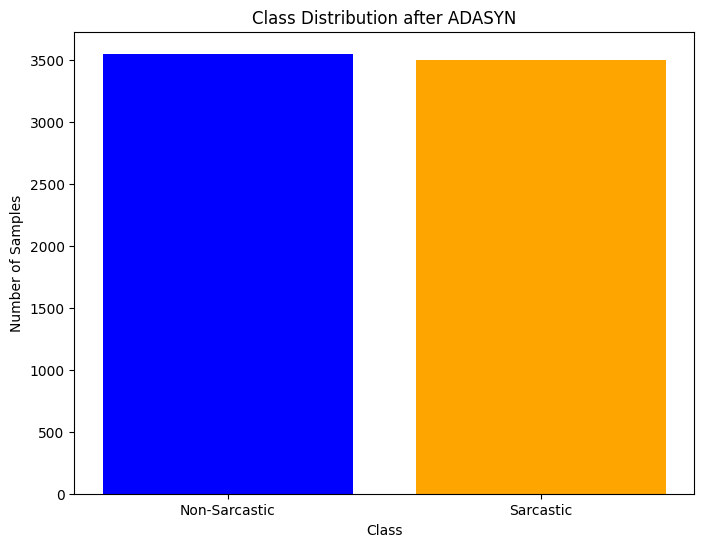

0    3553
1    3506
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import ADASYN
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

# Ensure that the labels are correctly encoded (0 for Non-Sarcastic, 1 for Sarcastic)
data['Label'] = data['Label'].map({0: 0, 1: 1})

tweets = data["Tweet"].tolist()
labels = data["Label"].tolist()

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(tweets)

# Apply ADASYN to balance the class distribution based on the TF-IDF features
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_tfidf, labels)

# Count the number of samples in each class after ADASYN
class_counts_resampled = pd.Series(y_resampled).value_counts()

# Plot the class distribution after ADASYN
plt.figure(figsize=(8, 6))
plt.bar(class_counts_resampled.index, class_counts_resampled.values, color=['blue', 'orange'])
plt.xticks(class_counts_resampled.index, ['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution after ADASYN')
plt.show()

print(class_counts_resampled)



TD-IDF VECTORIZATION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

# Ensure that the labels are correctly encoded (0 for Non-Sarcastic, 1 for Sarcastic)
data['Label'] = data['Label'].map({0: "Non-Sarcastic", 1: "Sarcastic"})

tweets = data["Tweet"].tolist()
labels = data["Label"].tolist()

# Split data into train and test sets
train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(train_tweets)
X_test_tfidf = vectorizer.transform(test_tweets)

# Convert TF-IDF matrices to dense NumPy arrays
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Print the shapes of the TF-IDF matrices
print("Shape of X_train_tfidf_dense:", X_train_tfidf_dense.shape)
print("Shape of X_test_tfidf_dense:", X_test_tfidf_dense.shape)



Shape of X_train_tfidf_dense: (3642, 5000)
Shape of X_test_tfidf_dense: (911, 5000)


HEAT MAP OF DATASET

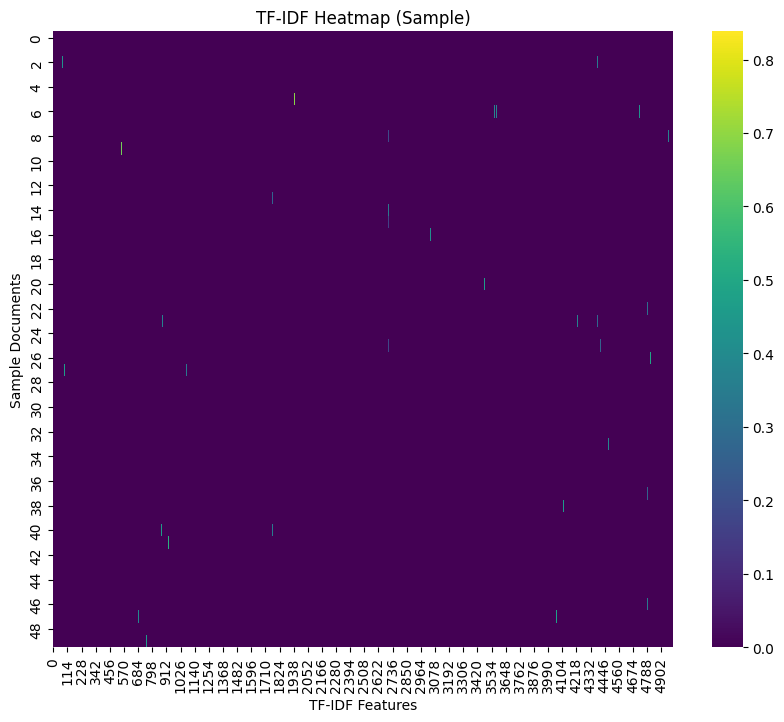

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the TF-IDF matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_tfidf_dense[:50, :], cmap='viridis')
plt.title('TF-IDF Heatmap (Sample)')
plt.xlabel('TF-IDF Features')
plt.ylabel('Sample Documents')
plt.show()


ADASYN - TD-IDF - LSTM MODEL

Epoch 1/10
46/46 [==============================] - 7s 113ms/step - loss: 0.5497 - accuracy: 0.7628 - val_loss: 0.4125 - val_accuracy: 0.8011
Epoch 2/10
46/46 [==============================] - 4s 86ms/step - loss: 0.2804 - accuracy: 0.8798 - val_loss: 0.2398 - val_accuracy: 0.9081
Epoch 3/10
46/46 [==============================] - 4s 96ms/step - loss: 0.1253 - accuracy: 0.9550 - val_loss: 0.2292 - val_accuracy: 0.9204
Epoch 4/10
46/46 [==============================] - 6s 123ms/step - loss: 0.0657 - accuracy: 0.9791 - val_loss: 0.2504 - val_accuracy: 0.9191
Epoch 5/10
46/46 [==============================] - 4s 98ms/step - loss: 0.0383 - accuracy: 0.9870 - val_loss: 0.3058 - val_accuracy: 0.9108
Epoch 6/10
46/46 [==============================] - 7s 143ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.3162 - val_accuracy: 0.9177
Epoch 7/10
46/46 [==============================] - 6s 120ms/step - loss: 0.0131 - accuracy: 0.9979 - val_loss: 0.3399 - val_accuracy: 0.9150
Epoch 8/1

<function matplotlib.pyplot.show(close=None, block=None)>

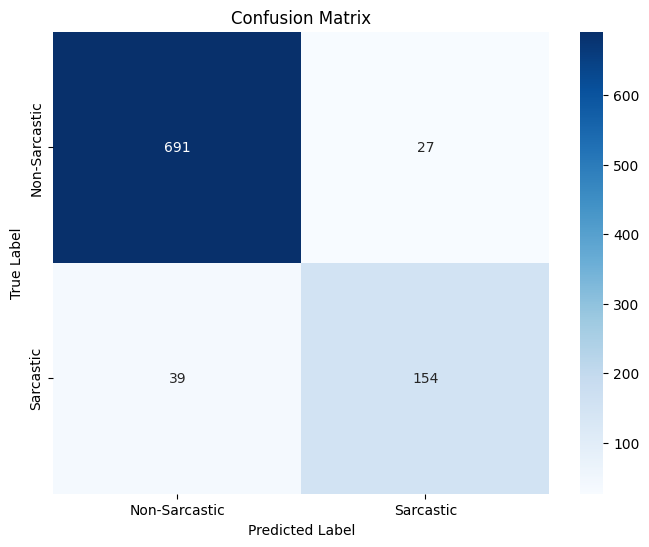

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Added for heatmap
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Load dataset
data = pd.read_csv("/content/Sarcasm_Kaggle_1.csv")

# Ensure that the labels are correctly encoded (0 for Non-Sarcastic, 1 for Sarcastic)
data['Label'] = data['Label'].map({0: 0, 1: 1})

tweets = data["Tweet"].tolist()
labels = data["Label"].tolist()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_sequence_length = 100  # You can adjust this based on your dataset
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Convert y_train to a NumPy array
y_train = np.array(y_train)

# Build an LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Plot the Confusion Matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Sarcastic", "Sarcastic"],
            yticklabels=["Non-Sarcastic", "Sarcastic"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show

